<a href="https://colab.research.google.com/github/helakhaddar/Graduation_project/blob/main/EvaluationDataset_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data cleaning and preprocessing of the evaluation datasets:
This dataset is a complete different dataset, the data is extracted from facebook majorily and twitter
It's available on Kaggle : https://www.kaggle.com/datasets/syedabbasraza/suspicious-communication-on-social-platforms

We did these steps in this phase:
1. Preparation
2. Cleaning the text
3. analyzing the text length
4. Worldcloud and sentiment analysis
5. saving the cleaned dataset



In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
directory_path ="/content/drive/MyDrive/PFE/Data/"

## Importing librairies

In [ ]:
!pip install emoji
!pip install contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.2 MB/s eta 0:00:00


In [ ]:
import os
# Libraries for general purpose
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Text cleaning
import re
import string
import emoji
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud

from imblearn.under_sampling import RandomUnderSampler

## Loading the dataset and doing some cleaning:
- Removing some columns
- changing the labels into sth the model will understand (not strings)


In [ ]:
data = pd.read_csv(directory_path + "fb twitter datset/Suspicious Communication on Social Platforms.csv")
data.head()

,comments,tagging
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


In [ ]:
data.rename(columns={'tagging': 'label'}, inplace=True)

In [ ]:
data['label'].value_counts()

,count
label,
0,12179
1,7822


In [ ]:
print(f'There are around {int(data["comments"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 5364 duplicated tweets, we will remove them.


In [ ]:
data.drop_duplicates("comments", inplace=True)

In [ ]:
data.shape

(14637, 2)

In [ ]:
data.isnull().sum()

,0
comments,0
label,0


In [ ]:
def plot_label_distribution(df, label_column='label'):
    # Map the label column
    df['label'] = df[label_column].map({0: 'Non-cyberbullying', 1: 'Bullying'})

    # Plotting the distribution
    plt.figure(figsize=(6, 4))
    df['label'].value_counts().plot(kind='bar', color=['blue', 'red'])
    plt.title('Distribution of Cyberbullying Labels')
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

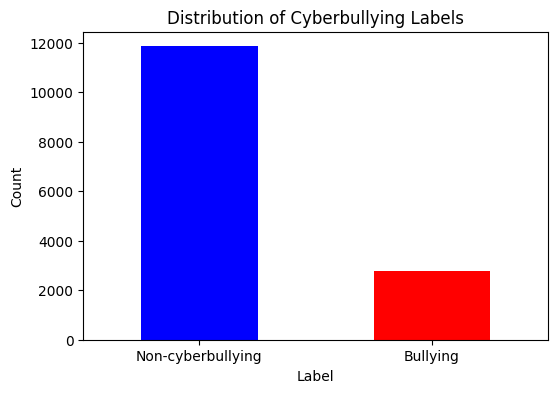

In [ ]:
plot_label_distribution(data)

## Cleaning Text:
*   Removing URLS
*   Removing hashtags and mentions
*   Removing special caracters, punctuation and numbers
*   Removing retweet





In [ ]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
lemmatize = WordNetLemmatizer()
stop_words = stopwords.words('english')

def clean_text(text):
    #clean emojis from text
    text = emoji.replace_emoji(text, replace="")

    # Expand contractions
    #text = contractions.fix(text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user mentions and hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Remove 'RT' (Retweet) indicator
    text = re.sub(r'\bRT\b', '', text)

    # Replace newline and carriage return with space, and convert to lowercase
    text = re.sub(r'\r|\n', ' ', text.lower())

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7f]', '', text)

    # Remove multiple spaces
    text = re.sub(r"\s\s+", " ", text)

    # Remove repeated words
    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
    text = remove_repeated_sequences(text)

    return text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data['cleaned_text'] = data['comments'].apply(clean_text)

In [ ]:
print(f'There are around {int(data["cleaned_text"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 5938 duplicated tweets, we will remove them.


In [ ]:
data.drop_duplicates("cleaned_text", inplace=True)

In [ ]:
print(f'There are around {int(train_data["cleaned_text"].isnull().sum())} null .')

There are around 0 null .


In [ ]:
data.label.value_counts()

,count
label,
0,11363
1,2700


### Analyzing the lenghth of the texts

It returns the value below which 99.5% of the data in the text_len column falls

In [ ]:
data['text_len'] = [len(text.split()) for text in data.cleaned_text]

In [ ]:
data.sort_values(by=['text_len'], ascending=False)

,comments,label,cleaned_text,text_len
15312,So I say goodbye to a town that has ears and...,0,say goodbye town ears eyes hear whispering wal...,85
18283,I have him. My Timmy :]r He's super in every...,0,timmy r hes super everyway possible sweet sens...,80
15214,my parents turned the lights out on my siste...,0,parents turned lights sister watch newest texa...,79
16839,Hmmm.. Perhaps how if we want to take over a...,0,hmmm perhaps want take entire country make sur...,73
17125,thats really a hard question. and to be hone...,0,thats really hard question honest dont think c...,63
...,...,...,...,...
14684,*RAWR*?,0,rawr,1
14685,What do you dread doing but have to do it?,0,dread,1
14689,hehe :},0,hehe,1
16520,idk,0,idk,1


In [ ]:
data.label.value_counts()

,count
label,
0,11363
1,2700


Save the data to extract the sentiment features

In [ ]:
data.to_csv(os.path.join(directory_path, 'Dataset_cleaned.csv'), index=False)

## Data Analysis of the evaluation dataset:  
1. Generated the wordcloud to see the most frequent words in both classes
2. Analyzed the sentiment features afer extracting them

### Generating Worldclouds

In [ ]:
# Separate texts based on class labels
bullying_texts = data[data['label'] == 1]['cleaned_text']
non_bullying_texts = data[data['label'] == 0]['cleaned_text']

In [ ]:
# Combine texts for each class
bullying_text = ' '.join(bullying_texts)
non_bullying_text = ' '.join(non_bullying_texts)

In [ ]:
# Function to generate word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
    plt.figure(figsize=(6, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=10)
    plt.axis('off')
    plt.show()

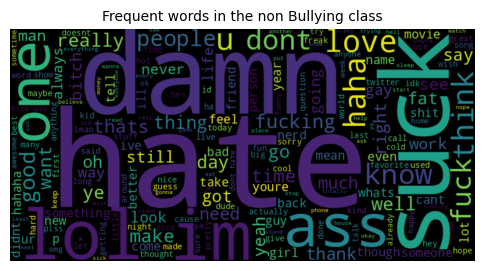

In [ ]:
generate_word_cloud(non_bullying_text, 'Frequent words in the non Bullying class')

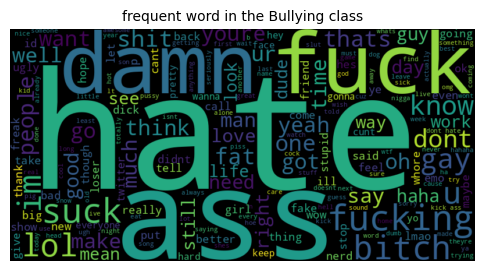

In [ ]:
# Generate word cloud for bullying
generate_word_cloud(bullying_text, 'frequent word in the Bullying class')

### Analyzing the sentiment features after the extraction

In [ ]:
dataset = pd.read_csv(os.path.join(directory_path, 'Dataset_with_Sentiment_Analysis.csv'))

In [ ]:
dataset['sentiment'].replace({'negative': -1 , 'positive': 1, 'neutral':0}, inplace=True)

In [ ]:
dataset.drop(['text_len'], inplace=True, axis=1)
dataset.head()

,comments,label,cleaned_text,sentiment
0,Get fucking real dude.,1,get fucking real dude,1
1,She is as dirty as they come and that crook ...,1,dirty come crook rengel dems fucking corrupt j...,-1
2,why did you fuck it up. I could do it all day...,1,fuck could day lets hour ping later sched writ...,-1
3,Dude they dont finish enclosing the fucking s...,1,dude dont finish enclosing fucking showers hat...,-1
4,WTF are you talking about Men? No men thats n...,1,wtf talking men thats menage gay,-1


In [ ]:
def plot_relation_sent_label(df):
  sent_label_cross = pd.crosstab(df['sentiment'], df['label'])
  sent_label_cross['sum'] = sent_label_cross[0.0] + sent_label_cross[1.0]
  sent_label_cross['non bullying tweet %'] = sent_label_cross[0.0]/sent_label_cross['sum']*100
  sent_label_cross['bullying tweet %'] = sent_label_cross[1.0]/sent_label_cross['sum']*100
  sent_label_cross = sent_label_cross.drop([0.0, 1.0, 'sum'], axis=1)

  ax = sent_label_cross.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#6dd2ac', '#3487a5'], width=0.8)
  plt.xlabel('Sentiment')
  plt.ylabel('percentage %')
  plt.title('Relation between sentiment and bullying')
  ax.legend(loc='lower right')
  plt.show()

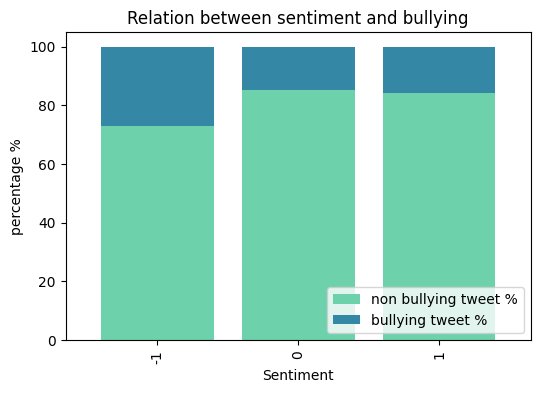

In [ ]:
plot_relation_sent_label(dataset)

In [ ]:
dataset.to_csv(os.path.join(directory_path, 'Dataset_sentiment.csv'), index=False)